In [29]:
#모듈 호출
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt # 파이썬에서 대표적인 데이터 시각화 모듈
import numpy as np
import pandas as pd

#로그
print("모듈 호출이 완료되었습니다.")

모듈 호출이 완료되었습니다.


In [30]:
#데이터 불러오기
wine = pd.read_csv('https://bit.ly/wine_csv_data')
#와인의 앞에 데이터 출력
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [31]:
#와인 데이터 특성 출력
#Column >> 어떤 열 인지
#Non-Null Count >> 누락되지 않은 데이터 개수
#Dtype >> 데이터의 형태
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [32]:
#와인 데이터에 데이터 한눈에 보기
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [33]:
#와인 데이터 전처리
#타깃 값과 입력 값으로 나누기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

#테스트 데이터와, 학습 데이터로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

#표준화
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#로그
print("나누어진 데이터 리스트의 형태", train_input.shape, test_input.shape)

나누어진 데이터 리스트의 형태 (5197, 3) (1300, 3)


In [34]:
#로지스틱 회귀로 와인 데이터 분류하기
from sklearn.linear_model import LogisticRegression

#학습
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

#채점
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

#확률을 예측하는 식
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


0.996921300750433
0.8592307692307692


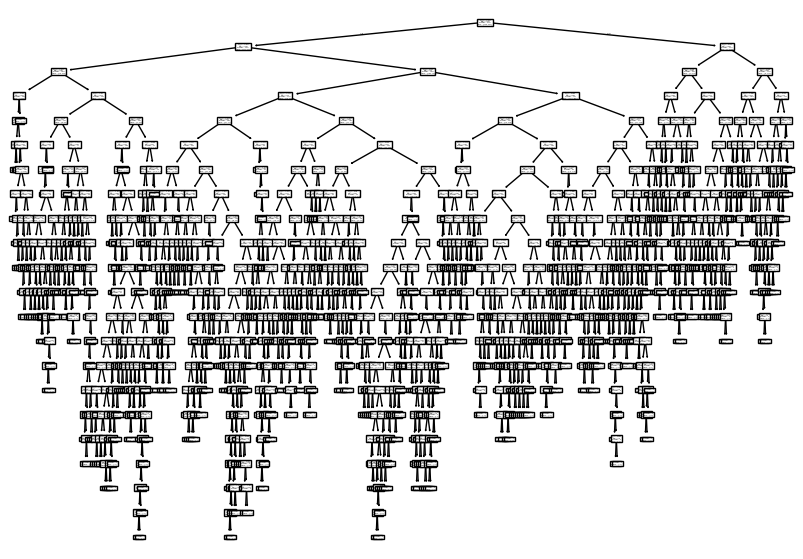

In [35]:
#'예' 혹은 '아니오' 로 나누어서, 화이트 와인인지, 레드 와인인지 나누고 싶다
#이 방법이 바로 '결정 트리'
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#학습
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

#채점
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#트리 그리기
plt.figure(figsize=(10, 7)) #이후에 생성되는 표의 크기를 설정하는 거임
plot_tree(dt)
plt.show()

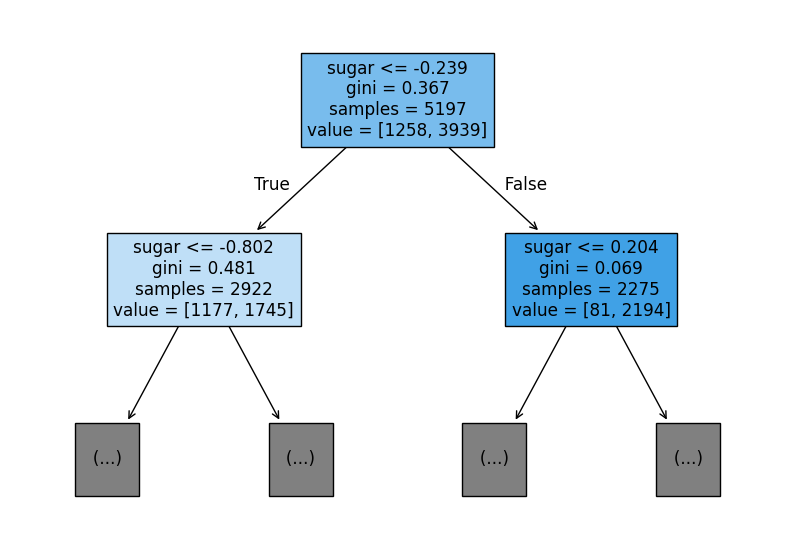

In [36]:
#트리를 조금 줄여서 그리기
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
##인자값
#max_depth>> 최대 출력할 트리 깊이
#filled>> 양성 클래스는  파란색으로, 음성 클래스는 붉은 색으로 지정
#feature_named>> 특성을 보기 쉽게 표현
##각 칸 안에 출력된 값
#첫 번째 줄 >> 나누는 조건
#두 번째 줄 >> 얼마나 비슷한 개수만큼 데이터가 나뉘는기
#세 번째 줄 >> 몇 개의 데이터를 입력받았는지
#네 번째 줄
plt.show()

0.8454877814123533
0.8415384615384616


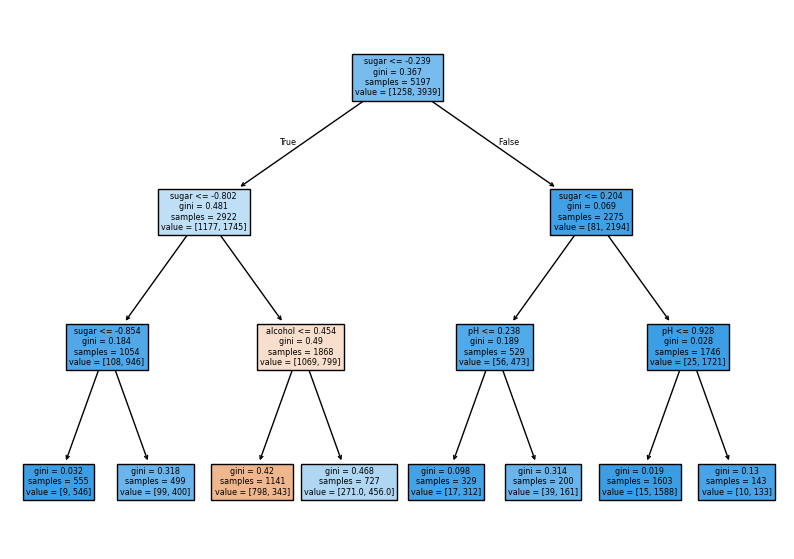

In [37]:
#가지치기 - 트리의 깊이를 제한하기(결정트리의 과대적합을 막는 방법 중 하나)
#학습
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

#채점
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

#트리 그리기
plt.figure(figsize=(10, 7)) #이후에 생성되는 표의 크기를 설정하는 거임
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

0.8454877814123533
0.8415384615384616


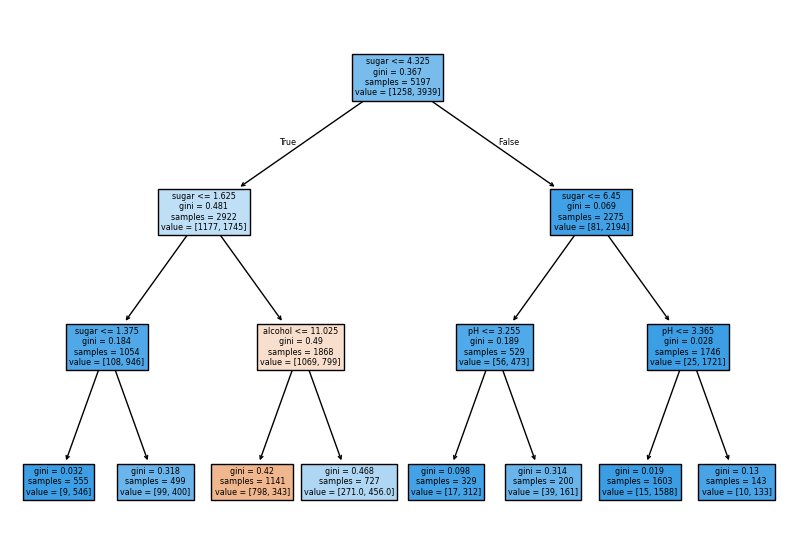

[0.12345626 0.86862934 0.0079144 ]


In [38]:
#사실상 결정 트리는 스케일을 조정할 필요가 없다.
#스케일 조정하지 않은 특성 사 용하기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

#채점
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

#트리 그리기
plt.figure(figsize=(10, 7)) #이후에 생성되는 표의 크기를 설정하는 거임
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

#특성의 중요도
print(dt.feature_importances_)

In [39]:
#검증 세트
#전체 데이터를 테스트 데이터와, 학습 데이터로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)
#학습 데이터를 검증 세트와 훈련 세트로 나누기
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape, test_input.shape)

(4157, 3) (1040, 3) (1300, 3)


In [40]:
#교차 검증
from sklearn.model_selection import cross_validate

scores = cross_validate(DecisionTreeClassifier(), train_input, train_target, cv=6)
#cv는 몇 개의 폴드로 나눌 지 정하는 값
print(scores)
#평균 점수
print(np.mean(scores['test_score']))

{'fit_time': array([0.00718021, 0.0068357 , 0.00580764, 0.00618863, 0.0073719 ,
       0.00653505]), 'score_time': array([0.00100613, 0.00100327, 0.00241399, 0.00150704, 0.        ,
       0.        ]), 'test_score': array([0.8638985 , 0.85796767, 0.86374134, 0.88568129, 0.86720554,
       0.83140878])}
0.8616505199190576


In [41]:
#분활기를 사용한 교차 검증
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(DecisionTreeClassifier(), train_input, train_target, cv=StratifiedKFold())

print(scores)
#평균 점수
print(np.mean(scores['test_score']))

{'fit_time': array([0.0066123 , 0.00582671, 0.00703049, 0.00630593, 0.00643969]), 'score_time': array([0.0010016 , 0.00099969, 0.        , 0.00100183, 0.00099945]), 'test_score': array([0.86634615, 0.84423077, 0.87391723, 0.84985563, 0.84023099])}
0.8549161545865107


In [42]:
#그리드 서치
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5,20, 1),
          'min_samples_split' : range(2, 100, 10)}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(gs.cv_results_['mean_test_score'])

0.892053107562055
[0.85780355 0.85799604 0.85799604 ... 0.86126601 0.86165063 0.86357629]


In [43]:
#확률 분포 선택
from scipy.stats import uniform, randint

rgen = randint(0, 10)
print(list(rgen.rvs(10)))

np.unique(rgen.rvs(1000), return_counts=True)

ugen = uniform(0, 1)
print(list(ugen.rvs(10)))

[9, 8, 3, 8, 2, 2, 3, 7, 4, 3]
[0.09613822721697418, 0.48629263490739605, 0.6881538561457428, 0.6218316943698408, 0.7936339620517437, 0.7764834168164115, 0.7221743828325965, 0.3479925218699782, 0.9823081647510239, 0.8924411710272726]


In [44]:
#랜덤 서치
params = {'min_impurity_decrease':uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : range(2, 100, 10), 
          'min_samples_leaf' : randint(1, 25)}

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

print(gs.best_params_)

print(np.max(gs.cv_results_['mean_test_score']))
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 42, 'min_impurity_decrease': 0.0003684748568901568, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.8699270748500778
0.8623076923076923


In [45]:
#랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

rf.fit(train_input, train_target)
print(rf.feature_importances_)

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.9973541965122431 0.8905151032797809
[0.23167441 0.50039841 0.26792718]
0.8934000384837406


In [46]:
#엑스트라 트리
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)

0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]


In [47]:
#그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

gb.fit(train_input, train_target)
print(gb.feature_importances_)

0.8881086892152563 0.8720430147331015
0.9464595437171814 0.8780082549788999
[0.15882696 0.6799705  0.16120254]


In [48]:
#히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [49]:
#Permutation Importance
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)

result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

hgb.score(test_input, test_target)

[0.08876275 0.23438522 0.08027708]
[0.05969231 0.20238462 0.049     ]


0.8723076923076923

In [53]:
#XGBoost vs LightGBM
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

#LightGBM
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686
0.935828414851749 0.8801251203079884
